2023-11-19 04:18:56.174159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-19 04:18:57.444061: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-11-19 04:18:57.444219: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

Found 140 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
{'kirmizi': 0, 'siirt': 1}


2023-11-19 04:18:58.502709: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-11-19 04:18:58.502750: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-19 04:18:58.502776: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-20231118-173352): /proc/driver/nvidia/version does not exist
2023-11-19 04:18:58.503106: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 128)               16257152  
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 16,259,338
Trainable params: 16,259,338
Non-trainable params: 0
____________________________________________

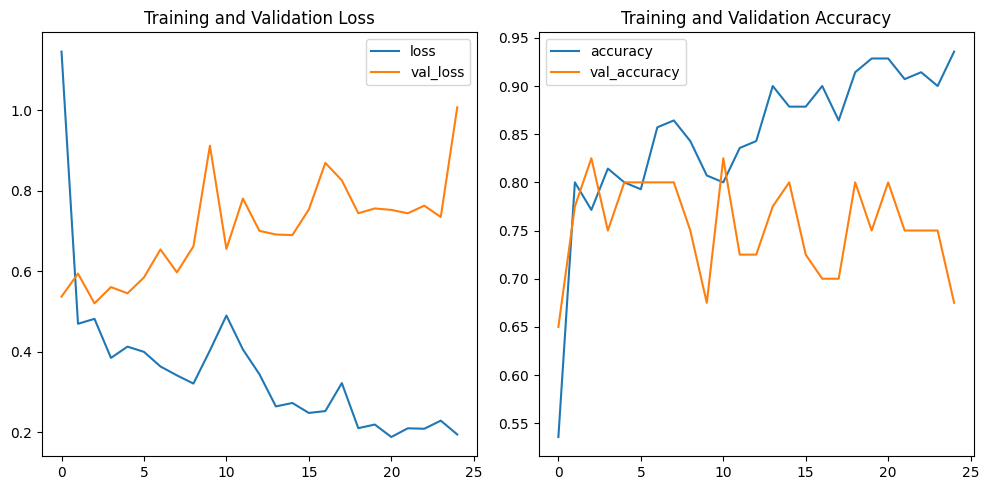

1/1 [==============================] - 0s 118ms/step - loss: 0.3396 - accuracy: 0.8000
Test accuracy: 0.800000011920929


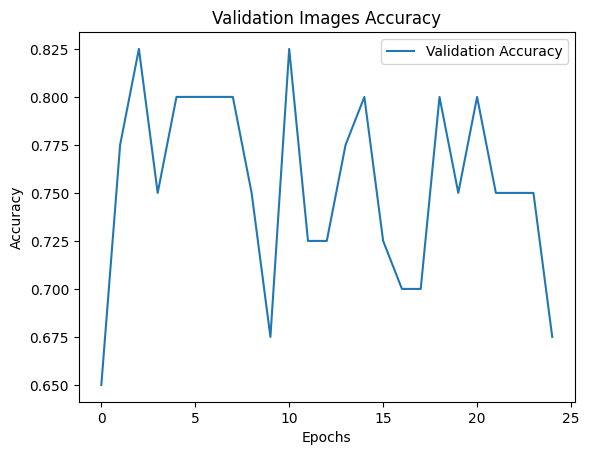

Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               16257152  
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 16,259,338
Trainable para

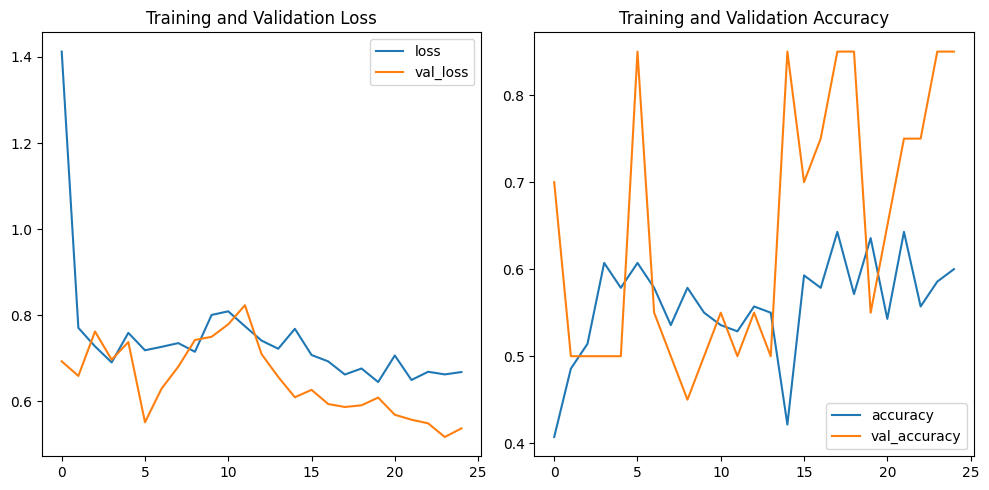

1/1 [==============================] - 0s 141ms/step - loss: 0.5374 - accuracy: 0.8500
Test accuracy: 0.8500000238418579


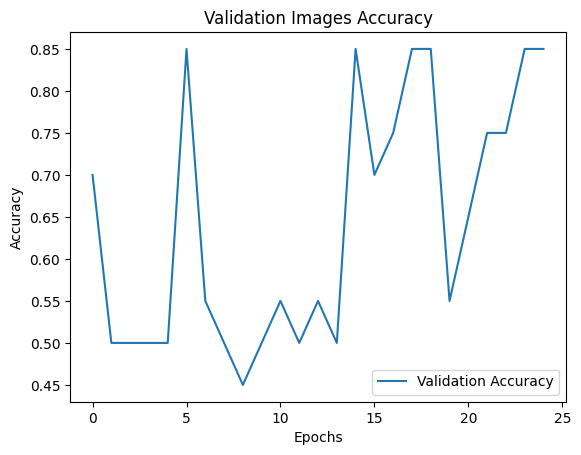

In [1]:
import requests
requests.packages.urllib3.disable_warnings()

# Define the URL to download the dataset
dataset_url = "https://www.muratkoklu.com/datasets/vtdhnd12.php"

# Download the dataset to a temporary file
response = requests.get(dataset_url)
with open("pistachio_dataset.zip", "wb") as f:
    f.write(response.content)

# Extract the dataset from the ZIP file
import zipfile
with zipfile.ZipFile("pistachio_dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

# Delete the temporary ZIP file
import os
os.remove("pistachio_dataset.zip")


import shutil
import os
import numpy as np

# Define the source directories for the downloaded images
kirmizi_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/"
siirt_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio/"

# Define the directories for train, test, and validation sets for both categories
train_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi"
test_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi"
validation_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi"

train_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt"
test_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt"
validation_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt"

# Create directories for train, test, and validation sets for both categories
for directory in [train_dir_kirmizi, test_dir_kirmizi, validation_dir_kirmizi,
                  train_dir_siirt, test_dir_siirt, validation_dir_siirt]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the total number of images in each category
total_kirmizi_images = len(os.listdir(kirmizi_dir))
total_siirt_images = len(os.listdir(siirt_dir))

# Define the number of images to copy for each set
train_images = 70
test_images = 20
validation_images = 10

# Copy Kirmizi images
kirmizi_image_files = os.listdir(kirmizi_dir)
np.random.shuffle(kirmizi_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Copy Siirt images
siirt_image_files = os.listdir(siirt_dir)
np.random.shuffle(siirt_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)



# import shutil
# import os
# import numpy as np

# # Define the source directories for the downloaded images
# kirmizi_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/"
# siirt_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio/"

# # Define the directories for train, test, and validation sets for both categories
# train_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi"
# test_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi"
# validation_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi"

# train_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt"
# test_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt"
# validation_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt"

# # Create directories for train, test, and validation sets for both categories
# for directory in [train_dir_kirmizi, test_dir_kirmizi, validation_dir_kirmizi,
#                   train_dir_siirt, test_dir_siirt, validation_dir_siirt]:
#     if not os.path.exists(directory):
#         os.makedirs(directory)

# # Define the ratio for splitting the data into train, test, and validation sets
# train_ratio = 0.7
# test_ratio = 0.2
# validation_ratio = 0.1

# # Function to split images into respective directories
# def split_images(image_files, source_dir, train_dir, test_dir, validation_dir):
#     for image_file in image_files:
#         source_path = os.path.join(source_dir, image_file)

#         # Randomly select a set for the image
#         random_number = np.random.random()

#         if random_number < train_ratio:
#             destination_path = os.path.join(train_dir, image_file)
#         elif random_number < train_ratio + test_ratio:
#             destination_path = os.path.join(test_dir, image_file)
#         else:
#             destination_path = os.path.join(validation_dir, image_file)

#         shutil.move(source_path, destination_path)

# # Split the image files from Kirmizi_Pistachio directory
# kirmizi_image_files = os.listdir(kirmizi_dir)
# split_images(kirmizi_image_files, kirmizi_dir, train_dir_kirmizi, test_dir_kirmizi, validation_dir_kirmizi)

# # Split the image files from Siirt_Pistachio directory
# siirt_image_files = os.listdir(siirt_dir)
# split_images(siirt_image_files, siirt_dir, train_dir_siirt, test_dir_siirt, validation_dir_siirt)


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# # Define the path to the downloaded dataset
# dataset_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/"

train_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/"
test_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/"
validation_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/"

train_imagerescale = ImageDataGenerator(rescale=1./255) ### RGB to convert 0,1
test_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1

train_images = train_imagerescale.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)

test_images = test_imagerescale.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)

validation_images = test_imagerescale.flow_from_directory(
    validation_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)
print(train_images.class_indices)


from tensorflow.keras import layers, models, datasets, optimizers
# Define the CNN model
model = models.Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layer with 128 neurons and ReLU activation
model.add(layers.Dense(128, activation = 'relu'))

# Output layer with 10 neuron and softmax activation for binary classification
model.add(layers.Dense(10, activation = 'softmax'))

# Show model summary
model.summary()


# # Compile the CNN model with sparse_categorical cross-entropy loss and accuracy metric #binary_accuracy
# model.compile(
#     loss='binary_crossentropy',
#     optimizer='adam',
#     # metrics=['binary_accuracy']
#     metrics=['accuracy']
# )

# Compile the CNN model with sparse_categorical cross-entropy loss and accuracy metric
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.01),
    metrics = ['accuracy']
)

# Train the model using the ImageDataGenerators
history = model.fit(train_images,validation_data=test_images,epochs=25)

# Plot training history for CNN model
history_frame = pd.DataFrame(history.history)

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
history_frame.loc[:, ['loss', 'val_loss']].plot(ax=plt.gca())
plt.title('Training and Validation Loss')

# Plotting Accuracy
plt.subplot(1, 2, 2)
# history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=plt.gca())
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot(ax=plt.gca())
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


# Evaluate the model on the testing set
validation_loss, validation_acc = model.evaluate(validation_images) #validation_labels
print('Test accuracy:', validation_acc)

# Plotting the test accuracy
# plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Images Accuracy')
plt.show()



from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagerescale = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
train_images = train_imagerescale.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    # batch_size=11,
    class_mode = 'binary'
)

test_imagerescale = ImageDataGenerator(rescale=1./255)
test_images = test_imagerescale.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    # batch_size=11,
    class_mode = 'binary'
)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                        input_shape = (128, 128, 3)
                       )
         )
model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# model.compile(
#     loss = 'binary_crossentropy',
#     optimizer = optimizers.Adam,
#     metrics = ['binary_accuracy']
# )

# Compile the CNN model with sparse_categorical cross-entropy loss and accuracy metric #binary_accuracy
# model.compile(
#     loss='binary_crossentropy',
#     optimizer='adam',
#     # metrics=['binary_accuracy']
#     metrics=['accuracy']
# )
# Compile the CNN model with sparse_categorical cross-entropy loss and accuracy metric
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.01),
    metrics = ['accuracy']
)

model.summary()

history = model.fit(
    train_images,
    validation_data=test_images,
    epochs=25,
)


# # Compile the CNN model with sparse_categorical cross-entropy loss and accuracy metric #binary_accuracy
# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer='adam',
#     metrics=['binary_accuracy']
# )

# # Train the model using the ImageDataGenerators
# history = model.fit(train_images,validation_data=test_images,epochs=10)

# Plot training history for CNN model
history_frame = pd.DataFrame(history.history)

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
history_frame.loc[:, ['loss', 'val_loss']].plot(ax=plt.gca())
plt.title('Training and Validation Loss')

# Plotting Accuracy
plt.subplot(1, 2, 2)
# history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=plt.gca())
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot(ax=plt.gca())
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


# Evaluate the model on the testing set
validation_loss, validation_acc = model.evaluate(validation_images) #validation_labels
print('Test accuracy:', validation_acc)

# Plotting the test accuracy
# plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Images Accuracy')
plt.show()


In [1]:
!pwd
!ls
%cd ./01-ai-nn-image-dataset
!ls
!rm -rf Pistachio_Image_Dataset/
!ls

/home/jupyter/01-ai-nn-image-dataset
 01-Artificial-Neural-Network-Implementation-using-a-Classification.ipynb
 01-image-dataset-classification.ipynb
 01-image-dataset-classification_test.ipynb
'01ANN vs 03CNN.ipynb'
 02-Neural-Network-Models-for-Combined-Classification-and-Regression-test.ipynb
 02_test.ipynb
 02_test_new_image_classification_logistic_regression.ipynb
 04-testing-local.ipynb
 04_cats_dogs
 20231029.h5
 20231029_01.h5
'Final_01_Artificial Neural Network (ANN) Implementation for Image Classification.ipynb'
'Final_01_Artificial Neural Network (ANN) Implementation for Image Classification_merged_cell.h5'
'Final_01_Artificial Neural Network (ANN) Implementation for Image Classification_merged_cell.ipynb'
'Final_03_Image Classification Model using Python.ipynb'
'Final_03_Image Classification Model using Python_merged_cell.ipynb'
 Pistachio_Image_Dataset
 README.md
 cat_vs_blue_jellyfish_20231029_01.keras
 cat_vs_blue_jellyfish_20231029_02.keras
 cat_vs_blue_jellyfish_202311